This is the 1 epoch
Mean Square error:3.105201005935669
This is the 2 epoch
Mean Square error:13.716099739074707
This is the 3 epoch
Mean Square error:0.7168989777565002
This is the 4 epoch
Mean Square error:0.49948158860206604
This is the 5 epoch
Mean Square error:0.23238228261470795
This is the 6 epoch
Mean Square error:0.15413397550582886
This is the 7 epoch
Mean Square error:0.20515598356723785
This is the 8 epoch
Mean Square error:0.28591951727867126
This is the 9 epoch
Mean Square error:0.35384202003479004
This is the 10 epoch
Mean Square error:0.4047114849090576
This is the 11 epoch
Mean Square error:0.4363725185394287
This is the 12 epoch
Mean Square error:0.4477165639400482
This is the 13 epoch
Mean Square error:0.43924498558044434
This is the 14 epoch
Mean Square error:0.41364434361457825
This is the 15 epoch
Mean Square error:0.37625452876091003
This is the 16 epoch
Mean Square error:0.3344091773033142
This is the 17 epoch
Mean Square error:0.29426223039627075
This is the 18

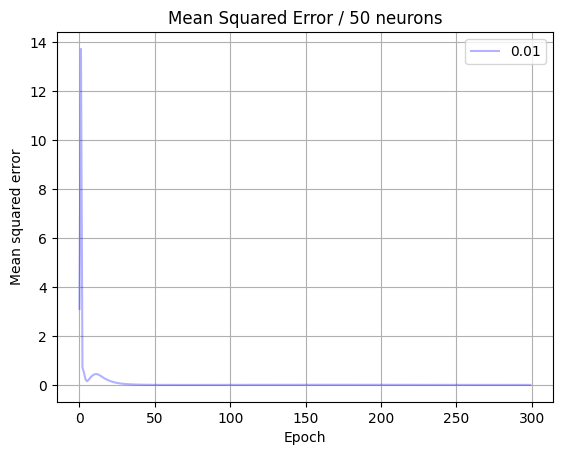

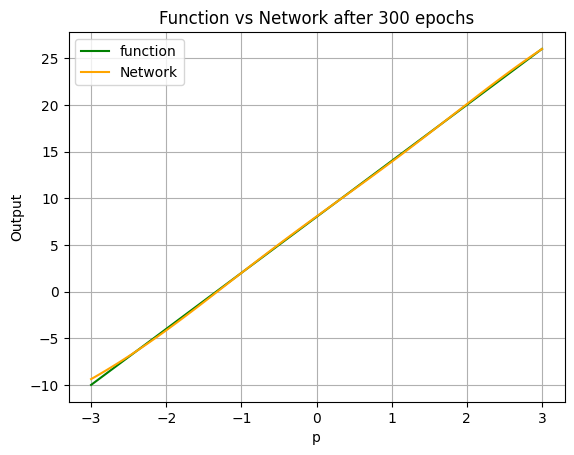

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import torch

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=300
    s = 50 #tedad noron ha
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s)

    for epoch in range(epochs):
        print("This is the {} epoch".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]
        print("Mean Square error:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s):
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2): 

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2): 
     s_2 = -2*1*error

     # TODO
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ):

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Epoch')
    plt.ylabel('Mean squared error')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Mean Squared Error / {} neurons'.format(s))
    plt.show()

def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label='function')
    plt.xlabel('p')
    plt.ylabel('Output')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Function vs Network after {} epochs'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()


def approximate_function(a_0):
    return a_0*6 + 8






if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:1.6091786623001099
This is the 2 epoch
Mean Square error:1.3825303316116333
This is the 3 epoch
Mean Square error:3.434643268585205
This is the 4 epoch
Mean Square error:2.2841055393218994
This is the 5 epoch
Mean Square error:1.3649537563323975
This is the 6 epoch
Mean Square error:0.7878905534744263
This is the 7 epoch
Mean Square error:0.442493736743927
This is the 8 epoch
Mean Square error:0.2508738934993744
This is the 9 epoch
Mean Square error:0.15776894986629486
This is the 10 epoch
Mean Square error:0.12092594057321548
This is the 11 epoch
Mean Square error:0.11077073961496353
This is the 12 epoch
Mean Square error:0.10944942384958267
This is the 13 epoch
Mean Square error:0.10804282873868942
This is the 14 epoch
Mean Square error:0.10339409112930298
This is the 15 epoch
Mean Square error:0.09548234194517136
This is the 16 epoch
Mean Square error:0.08561120927333832
This is the 17 epoch
Mean Square error:0.07533491402864456
This is the 18 e

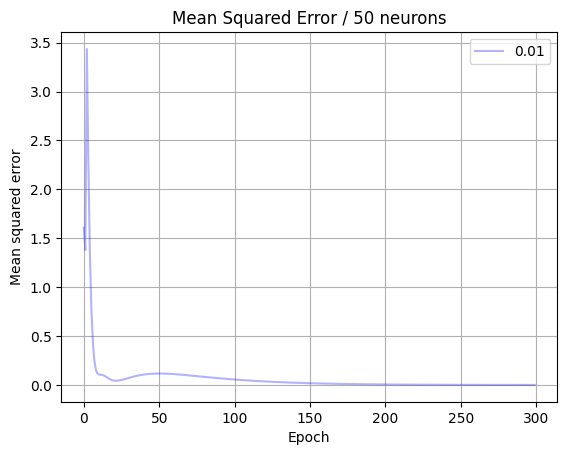

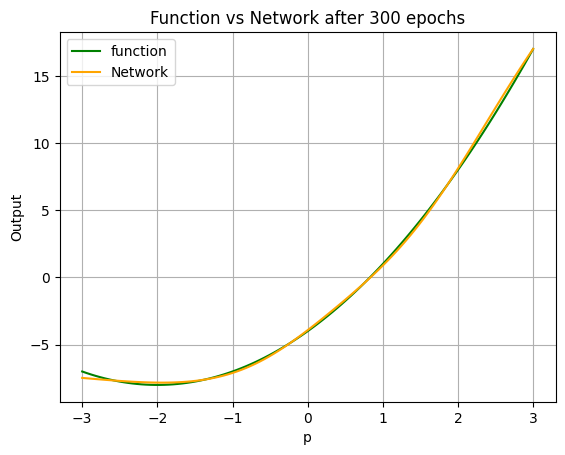

In [31]:
def approximate_function(a_0): #function we want to approximate
    return math.pow(a_0,2) + a_0*4 -4


if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:125.51278686523438
This is the 2 epoch
Mean Square error:12.938545227050781
This is the 3 epoch
Mean Square error:33.98037338256836
This is the 4 epoch
Mean Square error:27.975780487060547
This is the 5 epoch
Mean Square error:19.552875518798828
This is the 6 epoch
Mean Square error:9.017822265625
This is the 7 epoch
Mean Square error:3.936718702316284
This is the 8 epoch
Mean Square error:2.098083019256592
This is the 9 epoch
Mean Square error:1.5054031610488892
This is the 10 epoch
Mean Square error:1.3184194564819336
This is the 11 epoch
Mean Square error:1.2699427604675293
This is the 12 epoch
Mean Square error:1.4030297994613647
This is the 13 epoch
Mean Square error:1.5693761110305786
This is the 14 epoch
Mean Square error:1.5549590587615967
This is the 15 epoch
Mean Square error:1.5745480060577393
This is the 16 epoch
Mean Square error:1.524843454360962
This is the 17 epoch
Mean Square error:1.6088013648986816
This is the 18 epoch
Mean Squar

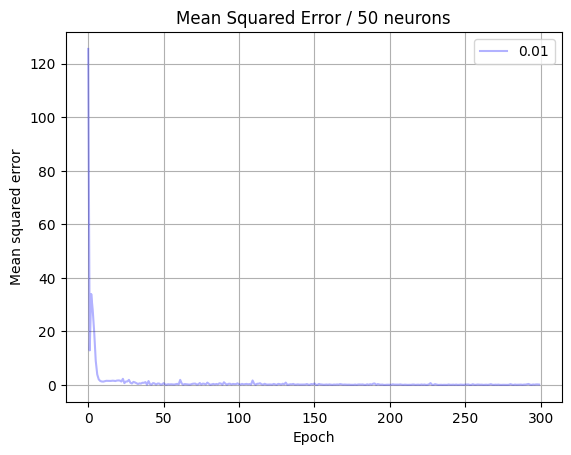

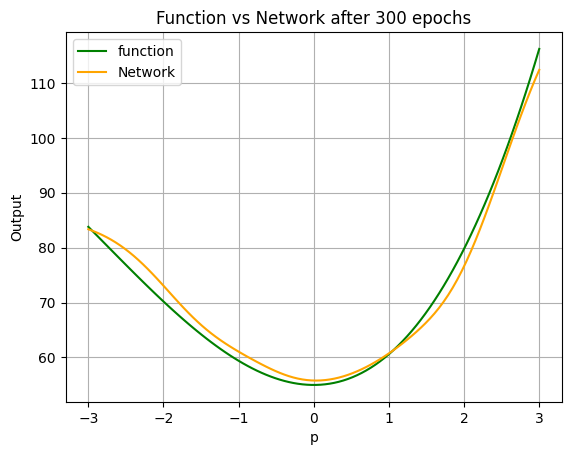

In [32]:
def approximate_function(a_0): #function we want to approximate
    return 0.6*math.pow(a_0,3)+5*math.pow(a_0,2)+55

if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:5.348245620727539
This is the 2 epoch
Mean Square error:0.37632888555526733
This is the 3 epoch
Mean Square error:0.07052432000637054
This is the 4 epoch
Mean Square error:0.06728009879589081
This is the 5 epoch
Mean Square error:0.0647757351398468
This is the 6 epoch
Mean Square error:0.06268569827079773
This is the 7 epoch
Mean Square error:0.06089577078819275
This is the 8 epoch
Mean Square error:0.05931463837623596
This is the 9 epoch
Mean Square error:0.05787243694067001
This is the 10 epoch
Mean Square error:0.056518372148275375
This is the 11 epoch
Mean Square error:0.055218156427145004
This is the 12 epoch
Mean Square error:0.05395164340734482
This is the 13 epoch
Mean Square error:0.0527103953063488
This is the 14 epoch
Mean Square error:0.05149538815021515
This is the 15 epoch
Mean Square error:0.05031482130289078
This is the 16 epoch
Mean Square error:0.04918237775564194
This is the 17 epoch
Mean Square error:0.048114970326423645
This is

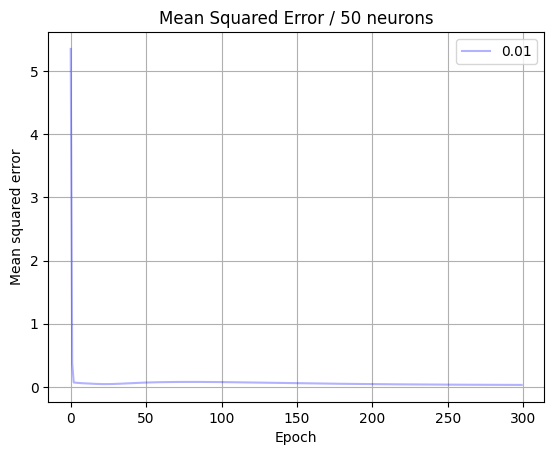

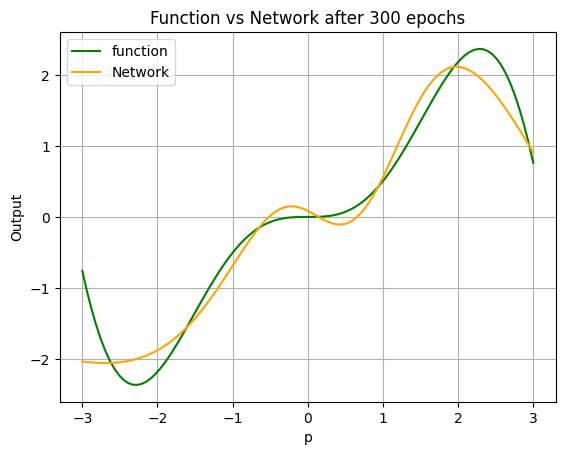

In [33]:
def approximate_function(a_0): #function we want to approximate
    return 0.6*math.pow(a_0,2)*math.sin(a_0)

if __name__ == '__main__':
    main()